<a href="https://www.facebook.com/codemakerz"><img src="https://scontent.ffjr1-4.fna.fbcdn.net/v/t1.0-9/36189148_736466693143793_2172101683281133568_n.png?_nc_cat=107&_nc_eui2=AeHzxv3SUcQBOfijLP-cEnHkX4z9XQXdeau__2MlErWZ1x07aZ1zx1PzJUDDxL6cpr7oPqYiifggXDptgtP8W5iCoDRjcdILDBYZ5Ig40dqi8Q&_nc_oc=AQmMCNXdzelFB2rdtpk8wN8nC410Wm2yKupYfYS1FxHNejTF0Jhr1G3WIZORKRF3TvFpohMB8Puw29Txxan8CW05&_nc_ht=scontent.ffjr1-4.fna&oh=7b13627e991a4d1b508923041bd7bc22&oe=5D8A7B03" />
</a>
Follow Us:
Facebook: https://www.facebook.com/codemakerz

<h1>Natural Language Processing - Email Ham & Spam</h1>
<h3>As a learner i am also looking for new things, Help us with your suggestion and ideas. </h3>

In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/spam-and-ham/spam.csv


# Load Data

In [20]:
df_mails = pd.read_csv('/kaggle/input/spam-and-ham/spam.csv',encoding= 'latin-1')

In [21]:
df_mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Missing Values

In [22]:
df_mails.isnull().sum()  #There are no missing value except unnamed column, we dont need those cols.

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# EDA

In [24]:
df_mails.v1.value_counts()  # We can see there are total 747 spam and 4825 ham

ham     4825
spam     747
Name: v1, dtype: int64

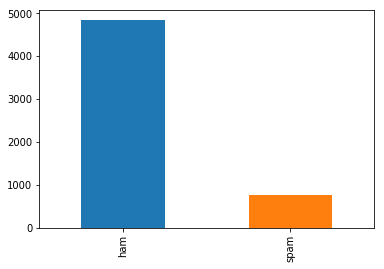

In [26]:
df_mails.v1.value_counts().plot(kind="bar");

# Split Train & Test

In [39]:
from sklearn.model_selection import train_test_split

In [38]:
X = df_mails["v2"] # Email
y = df_mails["v1"] # Result Ham or Spam

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=34)

# Term Frequency Inverse Document

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vectorizer = TfidfVectorizer()

In [46]:
X_train_tfidf = vectorizer.fit_transform(X_train)

# Train Classifier

In [47]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Pipeline

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

# Predict

In [51]:
predictions = text_clf.predict(X_test)

In [52]:
predictions # See prediction is in text form whichis very good. IN other machine learning algorithm we
# need to apply labelencoder.

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

# Confusion Matrix

In [53]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1590    4]
 [  29  216]]


# Classification Report

In [54]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1594
        spam       0.98      0.88      0.93       245

    accuracy                           0.98      1839
   macro avg       0.98      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [55]:
# So we can see we are getting a good prediction and recall for both the cases(ham & spam)

# Accuracy

In [56]:
print(metrics.accuracy_score(y_test, predictions)) # we got an accuray of 98% which is really amazing.

0.9820554649265906


# Test New Email

In [75]:
text_clf.predict(["Weekly Lottery Participation. Win upto $10,000."])

array(['spam'], dtype=object)

In [76]:
text_clf.predict(["Hello Sir, How are you?"])

array(['ham'], dtype=object)

In [ ]:
# So it is working as we expected. Try some more messages. !!! 

In [ ]:
# Thank you... !! UPVOTE if you like the code. 